In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Word Cloud for Python

# **Word Cloud programming**

---
#### - **Word cloud** is quit often called **Tag clouds**.
#### - Finding out the most important words or terms characterizing or classifying a text.
#### - "word cloud" as we use them also find out automatically **what are the most important words.**
#### - counting the number of **occurrances** and using **stop words**.
#### - This is not the correct way to find out about the 'real' importance of words, but leads to very interesting results.

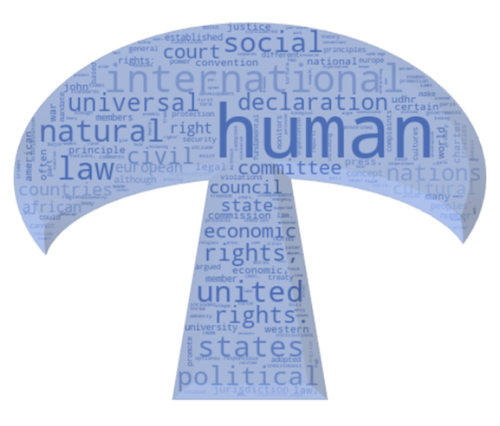

# word cloud processing flow

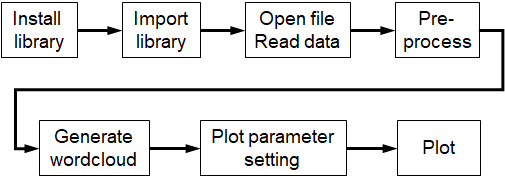






---



# Will be used sort of libraries
* numpy
* pandas
* matplotlib
* PIL
* wordcloud

## Install libraries using pip command

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install wordcloud
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import libraries

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Prepare contents(Text file)
-- Open file and read data
* open file
* read data from file

* Get file path and file name

In [ ]:
import os
import google
path = '/content/drive/MyDrive/Colab Notebooks/'
#cwd = os.getcwd()
folder_name = ''
# ------------------------------------------------------
# input file name
f_name = 'I have a dream.txt'
# ------------------------------------------------------


# if not define path, use current working directory
# pa = lambda p: cwd if p =='' else path

# make full path file name
file_name = os.path.join(path,folder_name,f_name)

In [ ]:
print(file_name)

/content/drive/MyDrive/Colab Notebooks/I have a dream.txt


In [ ]:
# open text file and read data
file_name = '/content/drive/MyDrive/Colab Notebooks/I have a dream.txt'
text = open(file_name, 'r').read()

# Define plotting function 

In [ ]:
# define plot function
def plt_wc(cloud_name):
    #plt.imshow(cloud_name, interpolation='bilinear')
    plt.imshow(cloud_name, interpolation='bicubic')
    plt.axis('off')
    plt.show()

# Generate word cloud data & Ploting

In [ ]:
# generate wordcloud
wc = WordCloud().generate(text)

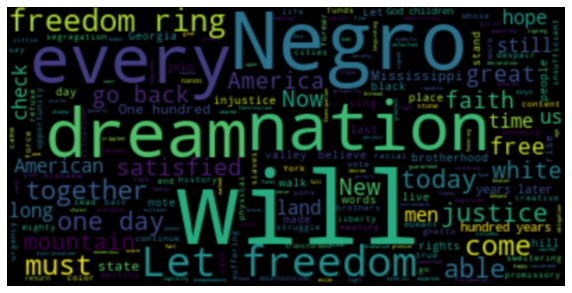

In [ ]:
plt.figure(figsize=(10, 7))
plt_wc(wc)

# Improving accuracy


* Pre-processing(stopword)

## Set stopwords to avoid ignorable words
* During word-counting, some words - like as 'a', 'the', 'is' ,'are' and so on - need to be elimilated.
* In Python, there is pre-defined data set for such a elimination - STOPWORDS.
* User can add some more words to skip for word-counting
* also, need to make lower case


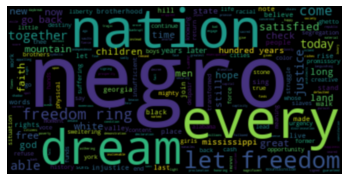

In [ ]:
# get user-define stopword list 
# eg: more_stopword = ['IPCC','climate','global', 'international', 'one', 'must', 'said']
# update default stopwords including  user stopword list

wc_stopword = set(STOPWORDS)
#more_stopword = ['al','et','fn','al','doi','global','change','land','changes']
more_stopword = ['day', 'story', 'much','must','america','s','us','american','one','another']
wc_stopword.update(more_stopword)

## Also, can add word by word using '.add()'
wc_stopword.add('will')

# make lower case
text = text.lower()

# generate word cloud
wc = WordCloud(stopwords = wc_stopword,).generate(text)
plt_wc(wc)


# Improving shape (set parameters)

Make better shape of word cloud
* using mask image
* change size
* change color (back_gound, font)
* etc...

### set parameter for WordCloud
* width (int) : (default=400) width size
* hight (int) : (default=200) hight size
* background_color : (default=black), white, gray, red, yellow ... etc
* mask (np_array) : np array from image file
* scale (float) : (default=1) Scaling between computation and drawing
* max_words : (default=200) The maximum number of words
* stopword : (default=STOPWORD) word that want to eliminate
* min_word_lengthint(int) : (default=0)
* max_font_size (int) : (default = None: hight of image)
* contour_color : color of contour
* contour_width (int) : width of contour line


## Masking Image : a cloud shape

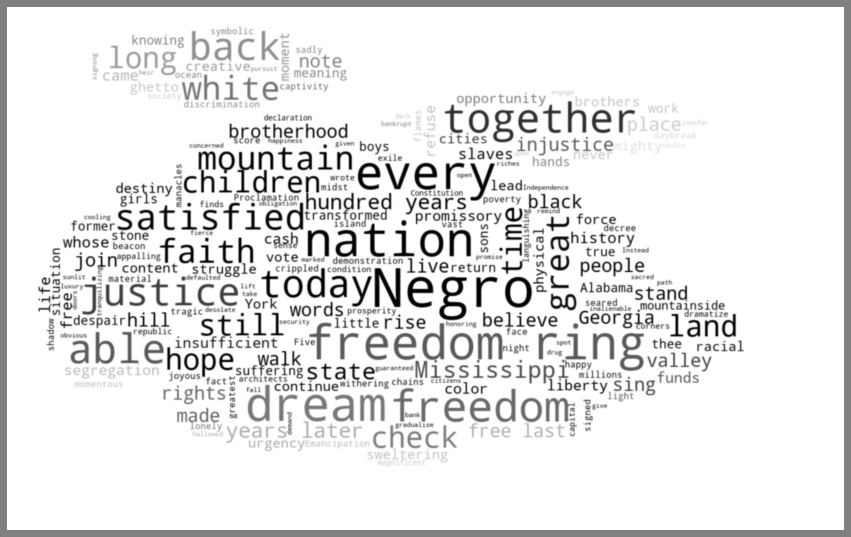

In [ ]:
more_stopword = ['know', 'come', 'days','need','american']
wc_stopword.update(more_stopword)

# set dictionary for init value
para_init = {"wc_width": 300, # default: 400
             "wc_height" : 200, # default: 200
             "wc_background_color" : "white", # default: 'black'
             "wc_scale" : 1, # default: 1
             "wc_max_words" : 200, # default: 400
             "wc_min_word_length" : 4, # default: 1
             "wc_max_font_size" : 100, # default: 70
             "wc_contour_color" : "white", # default: 'black'
             "wc_contour_width" :  0.5, # default: 1
            }

wc_mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/cloud.jpg'))
wc_stopword.add('another')
wc = WordCloud(mask = wc_mask,
               stopwords = wc_stopword,
               width = para_init['wc_width'],
               height = para_init['wc_height'],
               background_color = para_init['wc_background_color'],
               scale = para_init['wc_scale'],
               max_words = para_init['wc_max_words'],
               min_word_length = para_init['wc_min_word_length'],
               max_font_size = para_init['wc_max_font_size'], 
               contour_color = para_init['wc_contour_color'],
               contour_width = para_init['wc_contour_width'],
               collocations = True
)

wc.generate(text)
image_colors = ImageColorGenerator(wc_mask) # matchingn color with custom mask color
wc.recolor(color_func = image_colors)

# Plotting part
plt.figure(figsize=(15,10), facecolor='grey')
plt_wc(wc)


## Blending with original mask file

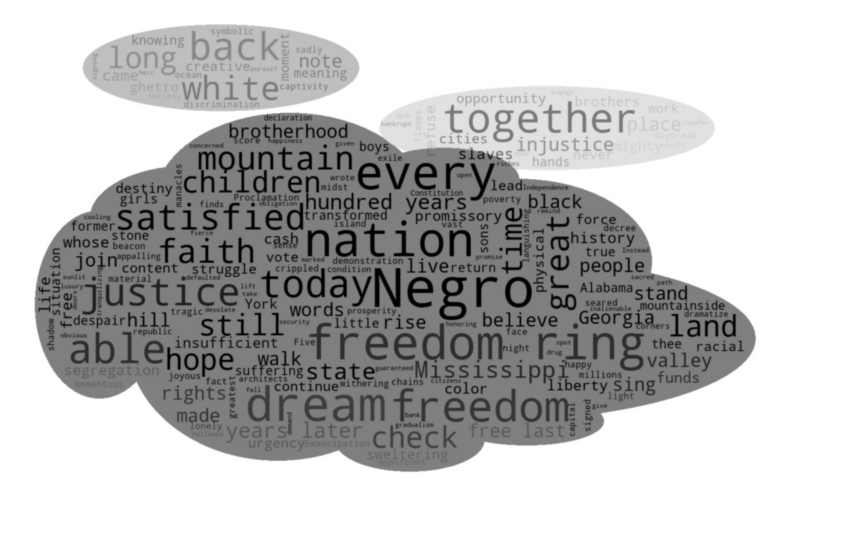

In [ ]:
wc_img = Image.fromarray(wc.to_array())
wc_mask_img = Image.fromarray(wc_mask)
new_img = Image.blend(wc_img, wc_mask_img, 0.5)
#Image.blend(wc_img, wc_mask_img, 0.5)

plt.figure(figsize=(15,10), facecolor='none')
plt_wc(new_img)

# Example with wikipedia 

* Wikipedia with Word Cloud

In [ ]:
!pip install Wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for Wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=da60eb696ef802278a5a13302551088b73b8dbb4c47e076705b1549f22636a25
  Stored in directory: /root/.cache/pip/wheels/07/93/05/72c05349177dca2e0ba31a33ba4f7907606f7ddef303517c6a
Successfully built Wikipedia


In [ ]:
import wikipedia
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

https://en.wikipedia.org/wiki/Earthquake


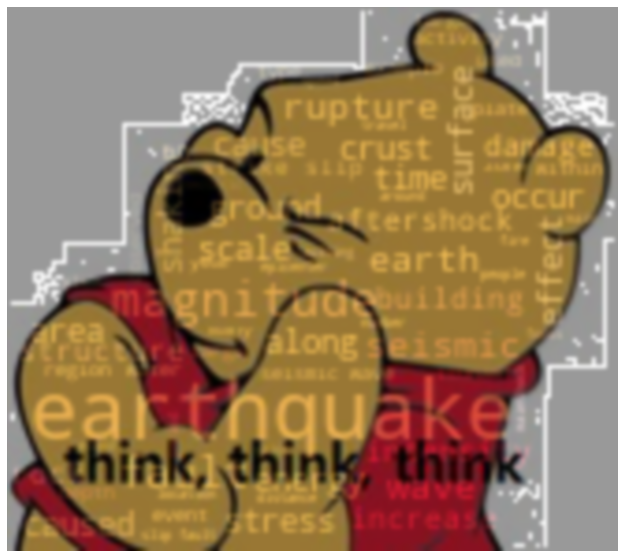

In [ ]:
#article = wikipedia.page("human, right")
article = wikipedia.page("earthquake")
print(article.url)
# print(article.content)
wiki_text = article.content

wc_stopword = set(STOPWORDS)
more_stopword = ['korea','korean']
wc_stopword.update(more_stopword)

## Also, can add word by word using '.add()'
# wc_stopword.add('said')
# stopword.add('let')

# make lower case
wiki_text = wiki_text.lower()
# set dictionary for init value
para_init = {"wc_width": 400, # default: 400
             "wc_height" : 200, # default: 200
             "wc_background_color" : "black", # default: 'black'
             "wc_scale" : 1, # default: 1
             "wc_max_words" : 150, # default: 400
             "wc_min_word_length" : 4, # default: 1
             "wc_max_font_size" : 100, # default: 70
             "wc_contour_color" : "white", # default: 'black'
             "wc_contour_width" :  0.5, # default: 1
            }

wc_mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/think.jpg'))
#wc_stopword.add('reference')
wc = WordCloud(mask = wc_mask,
               colormap = "magma",
               stopwords = wc_stopword,
               width = para_init['wc_width'],
               height = para_init['wc_height'],
               background_color = para_init['wc_background_color'],
               scale = para_init['wc_scale'],
               max_words = para_init['wc_max_words'],
               min_word_length = para_init['wc_min_word_length'],
               max_font_size = para_init['wc_max_font_size'], 
               contour_color = para_init['wc_contour_color'],
               contour_width = para_init['wc_contour_width'],
               collocations=True
              #color_func1 = get_single_color_func('deepskyblue')
              )

# print(type(wiki_text))
wc.generate(wiki_text)
colrs = ('red','black')
#image_colors = ImageColorGenerator(wc_mask) # matchingn color with custom mask color
image_colors = ImageColorGenerator(wc_mask, default_color = colrs) # matchingn color with custom mask color
wc.recolor(color_func = image_colors)
wc_img = Image.fromarray(wc.to_array())
wc_mask_img = Image.fromarray(wc_mask)
new_img = Image.blend(wc_img, wc_mask_img, 0.6)

plt.figure(figsize=(15,10), facecolor='none')
plt_wc(new_img)



---
## Using NLTK and frequency instead of wordcloud STOPWORD


In [ ]:
# import natural language token
import nltk
from nltk.corpus import stopwords

# get stop words list
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'time': 5, 'plate': 4, 'could': 4, 'including': 5, 'available': 4, 'early': 4, 'slow': 5, 'second': 6, 'increase': 9, 'structures': 7, 'rock': 9, 'people': 4, 'scale': 4, 'intensity': 9, 'aftershock': 5, 's-waves': 5, 'slip': 5, 'types': 4, 'tsunamis': 5, 'san': 5, 'zone': 4, 'soil': 5, 'high': 4, 'deep-focus': 4, 'larger': 10, 'depending': 4, 'used': 9, 'times': 5, 'event': 4, 'principal': 4, 'movement': 5, 'earth': 8, 'particularly': 4, 'resulting': 5, 'average': 5, 'released': 6, 'great': 5, 'destruction': 4, 'earthquake,': 11, 'place': 4, 'reverse': 5, 'shaking': 11, 'fracture': 4, 'strike-slip': 9, 'aftershocks': 4, 'single': 5, 'mass': 5, 'elastic': 4, 'strength': 4, 'main': 6, 'swarms': 4, 'powerful': 4, 'wave': 6, 'short': 5, 'buildings': 8, 'large': 8, 'tectonic': 8, 'pore': 5, 'particular': 4, 'three': 4, 'ground': 17, 'local': 4, 'earthquake.': 8, 'loss': 10, 'life': 4, 'every': 5, 'epicenter': 4, "earth's": 12, 'travel': 7, 'major': 8, 'pressure': 8, 'number': 6, 'brittle'

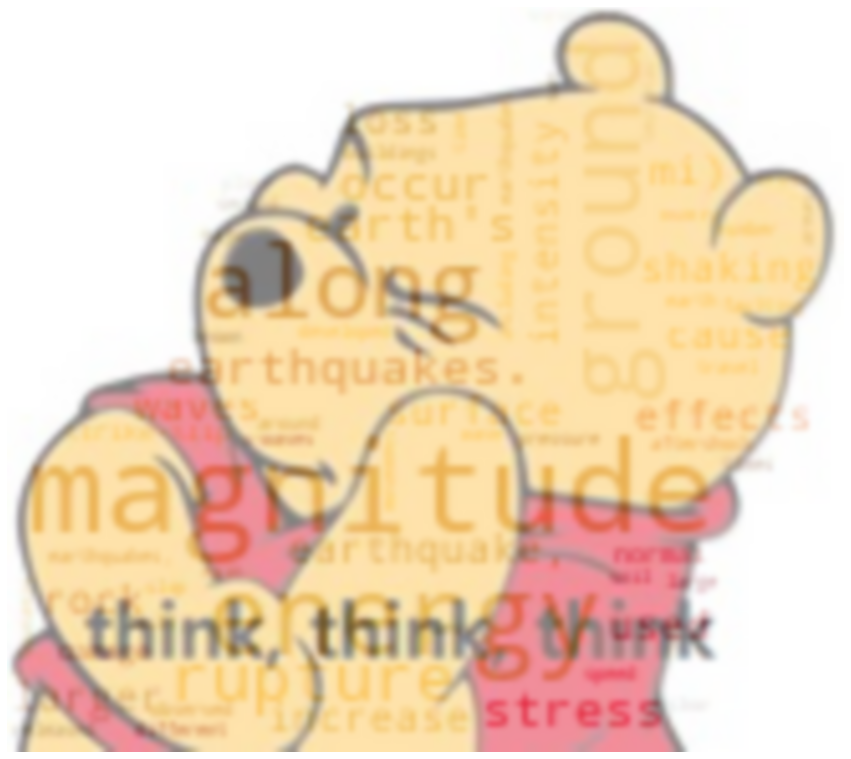

In [ ]:
list_words = wiki_text.split() # split by white_space
set_word = set(list_words) # make  a sequence consisting of distinct language(eliminating duplicate entries)
set_word.remove('===')
set_word.remove('also')
set_word.remove('use')
set_word.remove('one')
set_word.remove('with')
set_word.remove('may')
set_word.discard('rights')
# set_word.remove('rights,')
# set_word.remove('rights.')
# set_word.remove('into')
# set_word.remove('such')
# set_word.remove('they')
# set_word.remove('isbn')
# set_word.remove('human')
# set_word.remove('international')
# set_word.remove('united')

del_word = ['fault', 'faults','====','caused','per']
for elem in del_word:
    set_word.discard(elem)

set_word.remove('seismic')
set_word.remove('area')
set_word.remove('earthquakes')
set_word.remove('earthquake')
set_word.remove('within')

freq_words = {}
for sel_word in set_word:
    frequency = 0
    if sel_word in stop: continue # skip if word belong to stopword
    for compare_word in list_words:
        frequency += (sel_word.lower() == compare_word.lower())
    freq_words[sel_word.lower()] = frequency

# set user filter in here 
# ------------------------------------------------
over_twice = {}
for sel_item in freq_words.items():
    if (sel_item[1] > 3) & (len(sel_item[0]) > 2): # set_item[0]: word, set_item[1]: frequency
        over_twice[sel_item[0]] = sel_item[1]
# -------------------------------------------------
print(over_twice)
# set parameter dictionary for init value
para_init = {"wc_width": 800, # default: 400
             "wc_height" : 400, # default: 200
             "wc_background_color" : "white", # default: 'black'
             "wc_scale" : 1, # default: 1
             "wc_max_words" : 400, # default: 400
             "wc_min_word_length" : 4, # default: 1
             "wc_max_font_size" : 100, # default: 70
             "wc_contour_color" : "white", # default: 'black'
             "wc_contour_width" :  0.5, # default: 1
            }

wc_mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/think.jpg'))
wc_stopword.add('reference')
wc = WordCloud(mask = wc_mask,
               stopwords = wc_stopword,
               width = para_init['wc_width'],
               height = para_init['wc_height'],
               background_color = para_init['wc_background_color'],
               scale = para_init['wc_scale'],
               max_words = para_init['wc_max_words'],
               min_word_length = para_init['wc_min_word_length'],
               max_font_size = para_init['wc_max_font_size'], 
               contour_color = para_init['wc_contour_color'],
               contour_width = para_init['wc_contour_width'],
               collocations=True,
)

wc.generate_from_frequencies(over_twice)
image_colors = ImageColorGenerator(wc_mask) # matchingn color with custom mask color
wc.recolor(color_func = image_colors)
wc_img = Image.fromarray(wc.to_array())
wc_mask_img = Image.fromarray(wc_mask)
new_img = Image.blend(wc_img, wc_mask_img, 0.5)

plt.figure(figsize=(15,15), facecolor='none')
plt_wc(new_img)


# Additional Learning

## Adding fonts

* Download the font you want

* ex) Google Font Link : https://fonts.google.com/


<h3> Use the same text file you used above as is

* font_path : Upload the downloaded font file to Google Drive and write down the path.
* random_state : Set the desired number if you want the same shape for the next run

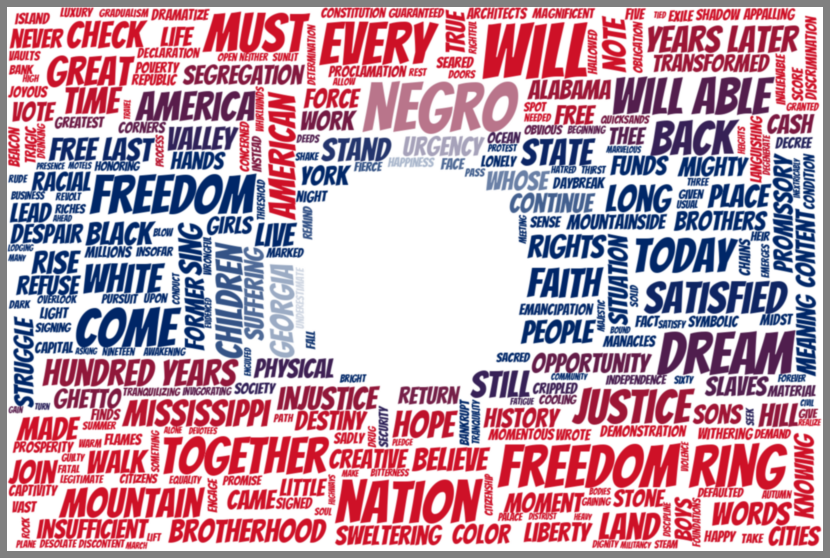

In [ ]:
#more_stopword = ['know', 'come', 'days','need','american']
#wc_stopword.update(more_stopword)

# set dictionary for init value
para_init = {"wc_width": 300, # default: 400
             "wc_height" : 200, # default: 200
             "wc_background_color" : "white", # default: 'black'
             "wc_scale" : 1, # default: 1
             "wc_max_words" : 300, # default: 400
             "wc_min_word_length" : 4, # default: 1
             "wc_max_font_size" : 120, # default: 70
             "wc_contour_color" : "white", # default: 'black'
             "wc_contour_width" :  0.3, # default: 1
              
              # Here's the added part. ▼
             "wc_font_path" : "/content/drive/MyDrive/Colab Notebooks/Bangers-Regular.ttf", 
             "wc_random_state" : 42,
            }

wc_mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/Flag_of_Laos.jpg'))
wc_stopword.add('another')
wc = WordCloud(mask = wc_mask,
               stopwords = wc_stopword,
               width = para_init['wc_width'],
               height = para_init['wc_height'],
               background_color = para_init['wc_background_color'],
               scale = para_init['wc_scale'],
               max_words = para_init['wc_max_words'],
               min_word_length = para_init['wc_min_word_length'],
               max_font_size = para_init['wc_max_font_size'], 
               contour_color = para_init['wc_contour_color'],
               contour_width = para_init['wc_contour_width'],
               collocations = True,
               
               # Here's the added part. ▼
               font_path = para_init["wc_font_path"],              
               random_state =  para_init["wc_random_state"],    
)

wc.generate(text)
image_colors = ImageColorGenerator(wc_mask) # matchingn color with custom mask color
wc.recolor(color_func = image_colors)

# Plotting part
plt.figure(figsize=(15,10), facecolor='grey')
plt_wc(wc)


## Save WordCloud as an Image

In [ ]:
# WordCloud to Image save
wc.to_file("/content/drive/MyDrive/Colab Notebooks/wc_Flag_of_Laos_.png")

## Save Blended Images

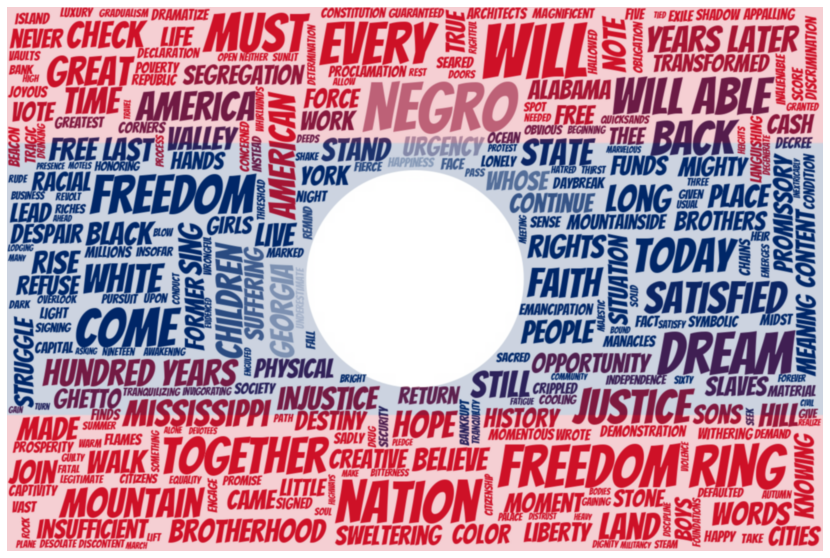

In [ ]:
wc_img = Image.fromarray(wc.to_array())
wc_mask_img = Image.fromarray(wc_mask)
new_img = Image.blend(wc_img, wc_mask_img, 0.2)
#Image.blend(wc_img, wc_mask_img, 0.5)

# Image to Image save (before plt show) ▼
new_img.save("/content/drive/MyDrive/Colab Notebooks/wc_Flag_of_Laos_blend.png")

plt.figure(figsize=(15,10), facecolor='none')
plt_wc(new_img)

## Specify a color map

* colormap name ▼

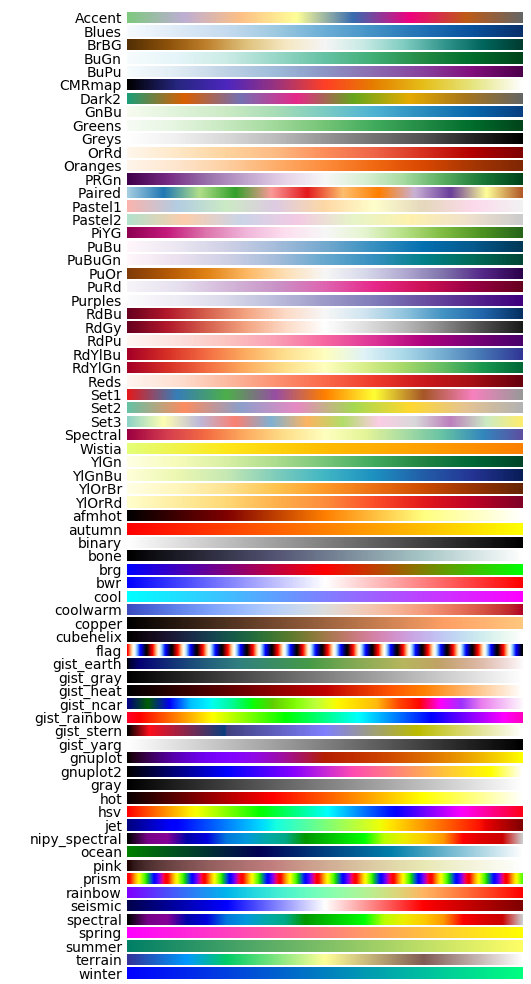

* colormap : "Set3"

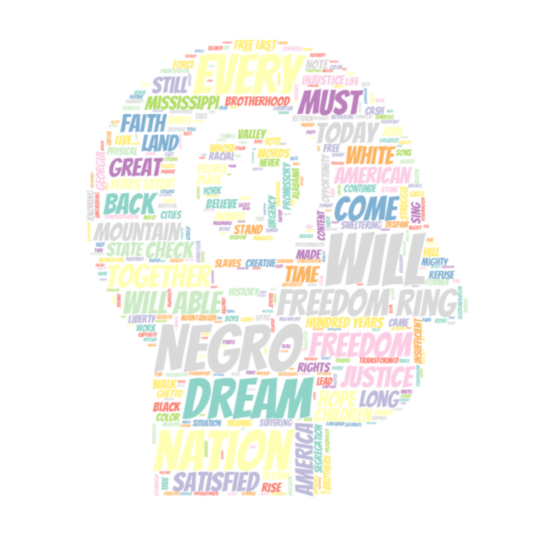

In [ ]:
#more_stopword = ['know', 'come', 'days','need','american']
#wc_stopword.update(more_stopword)

# set dictionary for init value
para_init = {"wc_width": 300, # default: 400
             "wc_height" : 400, # default: 200
             "wc_background_color" : "white", # default: 'black'
             "wc_scale" : 1, # default: 1
             "wc_max_words" : 400, # default: 400
             "wc_min_word_length" : 4, # default: 1
             "wc_max_font_size" : 100, # default: 70
             "wc_contour_color" : "white", # default: 'black'
             "wc_contour_width" :  0.3, # default: 1
             
             "wc_font_path" : "/content/drive/MyDrive/Colab Notebooks/Bangers-Regular.ttf", # font 
             "wc_random_state" : 42,

              # Here's the added part. ▼
             "wc_colormap" : "Set3", # colormap here
            }

wc_mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/idea.jpg'))
wc_stopword.add('another')
wc = WordCloud(mask = wc_mask,
               stopwords = wc_stopword,
               width = para_init['wc_width'],
               height = para_init['wc_height'],
               background_color = para_init['wc_background_color'],
               scale = para_init['wc_scale'],
               max_words = para_init['wc_max_words'],
               min_word_length = para_init['wc_min_word_length'],
               max_font_size = para_init['wc_max_font_size'], 
               contour_color = para_init['wc_contour_color'],
               contour_width = para_init['wc_contour_width'],
               collocations = True,
               
               font_path = para_init["wc_font_path"],              
               random_state =  para_init["wc_random_state"], 

               # Here's the added part. ▼
               colormap =  para_init["wc_colormap"], 
)

wc.generate(text)
#image_colors = ImageColorGenerator(wc_mask) # matchingn color with custom mask color
#wc.recolor(color_func = image_colors)

# Plotting part
plt.figure(figsize=(15,10), facecolor='none')
plt_wc(wc)

# WordCloud to Image save
wc.to_file("/content/drive/MyDrive/Colab Notebooks/wc_idea_1.png")

* colormap : "cool"

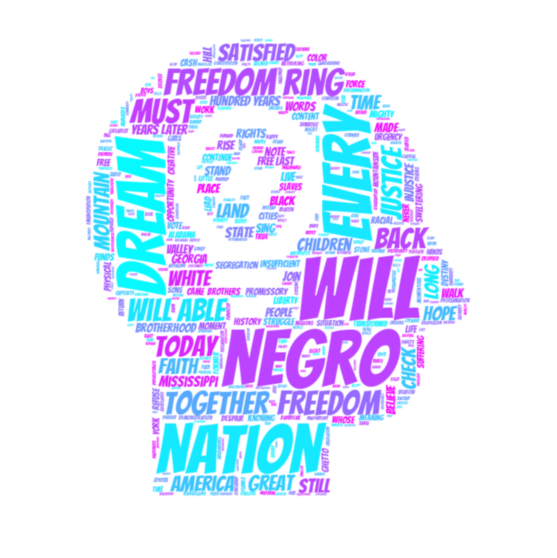

In [ ]:
more_stopword = ['know', 'come', 'days','need','american']
wc_stopword.update(more_stopword)

# set dictionary for init value
para_init = {"wc_width": 300, # default: 400
             "wc_height" : 400, # default: 200
             "wc_background_color" : "white", # default: 'black'
             "wc_scale" : 1, # default: 1
             "wc_max_words" : 400, # default: 400
             "wc_min_word_length" : 4, # default: 1
             "wc_max_font_size" : 120, # default: 70
             "wc_contour_color" : "white", # default: 'black'
             "wc_contour_width" :  0.3, # default: 1
             
             "wc_font_path" : "/content/drive/MyDrive/Colab Notebooks/Bangers-Regular.ttf", # font 
             "wc_random_state" : 42,

              # Here's the added part. ▼
             "wc_colormap" : "cool", # colormap here
            }

wc_mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/idea.jpg'))
wc_stopword.add('another')
wc = WordCloud(mask = wc_mask,
               stopwords = wc_stopword,
               width = para_init['wc_width'],
               height = para_init['wc_height'],
               background_color = para_init['wc_background_color'],
               scale = para_init['wc_scale'],
               max_words = para_init['wc_max_words'],
               min_word_length = para_init['wc_min_word_length'],
               max_font_size = para_init['wc_max_font_size'], 
               contour_color = para_init['wc_contour_color'],
               contour_width = para_init['wc_contour_width'],
               collocations = True,
               
               font_path = para_init["wc_font_path"],              
               random_state =  para_init["wc_random_state"], 
              
               # Here's the added part. ▼
               colormap =  para_init["wc_colormap"], 
)

wc.generate(text)
#image_colors = ImageColorGenerator(wc_mask) # matchingn color with custom mask color
#wc.recolor(color_func = image_colors)

# Plotting part
plt.figure(figsize=(15,10), facecolor='none')
plt_wc(wc)

# WordCloud to Image save
wc.to_file("/content/drive/MyDrive/Colab Notebooks/wc_idea_2.png")

## Get the text file you want and try working with it

* Use the example below to create your own word cloud.
* See the example below.
* I hope it helps you create your own word cloud.

### examples 1

* the script of good lecture during the ted lecture as a text file and worked on it.

In [ ]:
# TED : How great leaders inspire action
# LINK : https://www.ted.com/talks/simon_sinek_how_great_leaders_inspire_action?utm_campaign=tedspread&utm_medium=referral&utm_source=tedcomshare
# open text file and read data
file_name = '/content/drive/MyDrive/Colab Notebooks/How great leaders inspire action.txt'
text = open(file_name, 'r').read()

In [ ]:
# define plot function
def plt_wc(cloud_name):
#    plt.imshow(cloud_name, interpolation='bilinear')
    plt.imshow(cloud_name, interpolation='bicubic')
    plt.axis('off')
    plt.show()


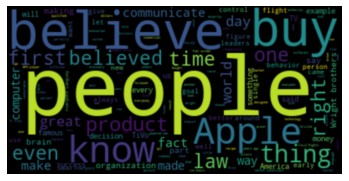

In [ ]:
# check the default output
wc = WordCloud().generate(text)
plt_wc(wc)

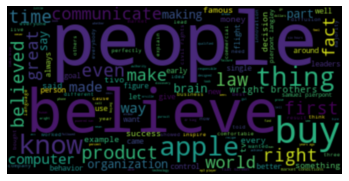

In [ ]:
# get user-define stopword list 
# eg: more_stopword = ['IPCC','climate','global', 'international', 'one', 'must', 'said']
# update default stopwords including  user stopword list

wc_stopword = set(STOPWORDS)
#more_stopword = ['al','et','fn','al','doi','global','change','land','changes']
more_stopword = ['day', 'story', 'much','must','america','s','us','american','one','another']
wc_stopword.update(more_stopword)

## Also, can add word by word using '.add()'
wc_stopword.add('will')

# make lower case
text = text.lower()

# generate word cloud
wc = WordCloud(stopwords = wc_stopword,).generate(text)
plt_wc(wc)


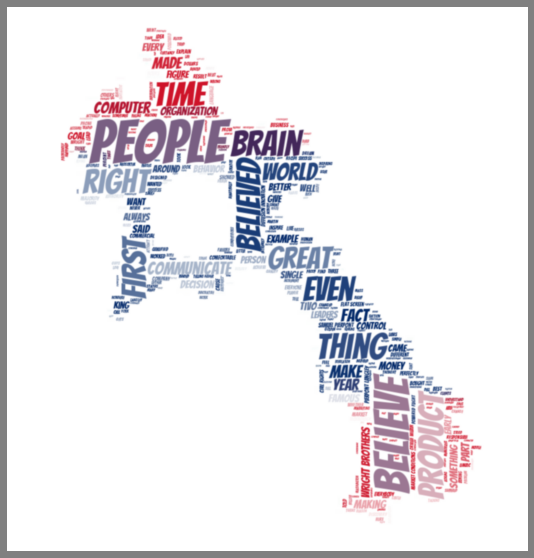

In [ ]:
more_stopword = ['know', 'come', 'days','need','american', 'apple']
wc_stopword.update(more_stopword)

# set dictionary for init value
para_init = {"wc_width": 300, # default: 400
             "wc_height" : 400, # default: 200
             "wc_background_color" : "white", # default: 'black'
             "wc_scale" : 1, # default: 1
             "wc_max_words" : 400, # default: 400
             "wc_min_word_length" : 4, # default: 1
             "wc_max_font_size" : 120, # default: 70
             "wc_contour_color" : "white", # default: 'black'
             "wc_contour_width" :  0.3, # default: 1
             
             "wc_font_path" : "/content/drive/MyDrive/Colab Notebooks/Bangers-Regular.ttf", # font 
             "wc_random_state" : 42,
            }

wc_mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/Laos_FlagColor.JPG'))
wc_stopword.add('another')
wc = WordCloud(mask = wc_mask,
               stopwords = wc_stopword,
               width = para_init['wc_width'],
               height = para_init['wc_height'],
               background_color = para_init['wc_background_color'],
               scale = para_init['wc_scale'],
               max_words = para_init['wc_max_words'],
               min_word_length = para_init['wc_min_word_length'],
               max_font_size = para_init['wc_max_font_size'], 
               contour_color = para_init['wc_contour_color'],
               contour_width = para_init['wc_contour_width'],
               collocations = True,
               
               font_path = para_init["wc_font_path"],              
               random_state =  para_init["wc_random_state"],    
)

wc.generate(text)
image_colors = ImageColorGenerator(wc_mask) # matchingn color with custom mask color
wc.recolor(color_func = image_colors)

# Plotting part
plt.figure(figsize=(15,10), facecolor='grey')
plt_wc(wc)


In [ ]:
# WordCloud to Image save
wc.to_file("/content/drive/MyDrive/Colab Notebooks/wc_Laos.png")

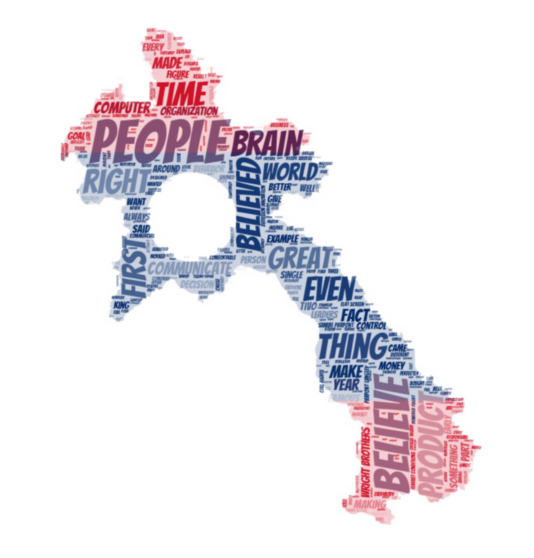

In [ ]:
wc_img = Image.fromarray(wc.to_array())
wc_mask_img = Image.fromarray(wc_mask)
new_img = Image.blend(wc_img, wc_mask_img, 0.2)
#Image.blend(wc_img, wc_mask_img, 0.5)

# Image to Image save (before plt show)
new_img.save("/content/drive/MyDrive/Colab Notebooks/wc_Laos_blend.png")

plt.figure(figsize=(15,10), facecolor='none')
plt_wc(new_img)

### examples 2 - change image

* Only mask image has been changed

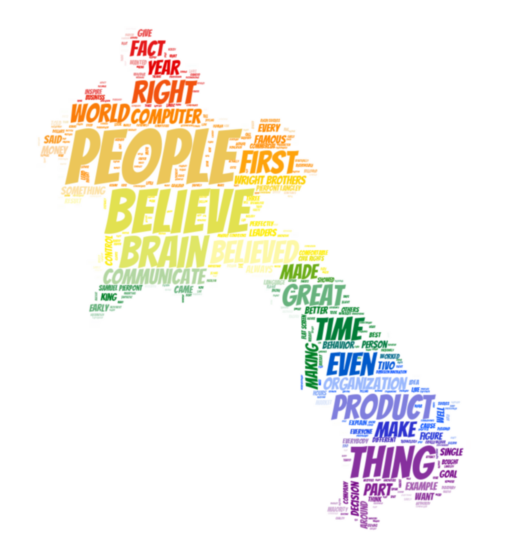

In [ ]:
more_stopword = ['know', 'come', 'days','need','american', 'apple']
wc_stopword.update(more_stopword)

# set dictionary for init value
para_init = {"wc_width": 300, # default: 400
             "wc_height" : 400, # default: 200
             "wc_background_color" : "white", # default: 'black'
             "wc_scale" : 1, # default: 1
             "wc_max_words" : 400, # default: 400
             "wc_min_word_length" : 4, # default: 1
             "wc_max_font_size" : 120, # default: 70
             "wc_contour_color" : "white", # default: 'black'
             "wc_contour_width" :  0.3, # default: 1
             
             "wc_font_path" : "/content/drive/MyDrive/Colab Notebooks/Bangers-Regular.ttf", # font 
             "wc_random_state" : 42,
            }

wc_mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/Laos_RainbowColor.JPG'))
wc_stopword.add('another')
wc = WordCloud(mask = wc_mask,
               stopwords = wc_stopword,
               width = para_init['wc_width'],
               height = para_init['wc_height'],
               background_color = para_init['wc_background_color'],
               scale = para_init['wc_scale'],
               max_words = para_init['wc_max_words'],
               min_word_length = para_init['wc_min_word_length'],
               max_font_size = para_init['wc_max_font_size'], 
               contour_color = para_init['wc_contour_color'],
               contour_width = para_init['wc_contour_width'],
               collocations = True,
               
               font_path = para_init["wc_font_path"],              
               random_state =  para_init["wc_random_state"],    
)

wc.generate(text)
image_colors = ImageColorGenerator(wc_mask) # matchingn color with custom mask color
wc.recolor(color_func = image_colors)

# Plotting part
plt.figure(figsize=(15,10), facecolor='none')
plt_wc(wc)

# WordCloud to Image save
wc.to_file("/content/drive/MyDrive/Colab Notebooks/wc_Laos_2.png")

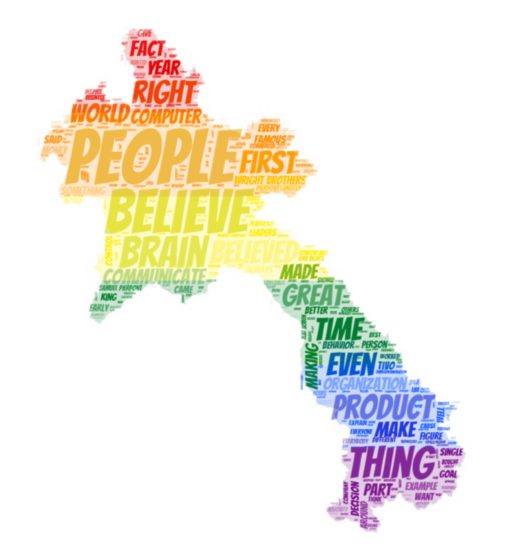

In [ ]:
wc_img = Image.fromarray(wc.to_array())
wc_mask_img = Image.fromarray(wc_mask)
new_img = Image.blend(wc_img, wc_mask_img, 0.2)
#Image.blend(wc_img, wc_mask_img, 0.5)

# Image to Image save (before plt show)
new_img.save("/content/drive/MyDrive/Colab Notebooks/wc_Laos_2_blend.png")

plt.figure(figsize=(15,10), facecolor='none')
plt_wc(new_img)

# Create WordCloud with Korean Text

In [ ]:
# konlpy installation
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 46.4 MB/s eta 0:00:00


In [ ]:
# Required Libr
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

In [ ]:
# open text file and read data
file_name = '/content/drive/MyDrive/Colab Notebooks/a Korean lecture program.txt'

# Korean needs to be encoded.
with open(file_name, 'r', encoding='utf-8') as f:
    text = f.read()

okt = Okt()
nouns = okt.nouns(text) # Extract nouns only

words = [n for n in nouns if len(n) > 1] # Except for one word in length.

# The dictionary data in the form of frequency per word 
#    is obtained by processing the words obtained above.
c = Counter(words) 

* More complex images take longer (30 seconds required)

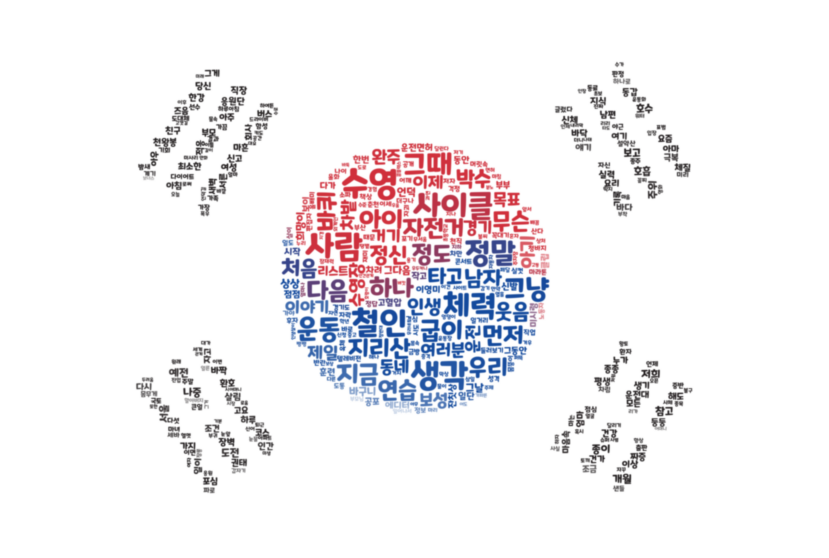

In [ ]:
#wc_stopword = set(STOPWORDS)
#more_stopword = ['그냥', '그때', '바퀴','무슨','등등']
#wc_stopword.update(more_stopword)

# set dictionary for init value
para_init = {"wc_width": 300, # default: 400
             "wc_height" : 400, # default: 200
             "wc_background_color" : "white", # default: 'black'
             "wc_scale" : 1, # default: 1
             "wc_max_words" : 400, # default: 400
             "wc_min_word_length" : 4, # default: 1
             "wc_max_font_size" : 100, # default: 70
             "wc_contour_color" : "white", # default: 'black'
             "wc_contour_width" :  0.3, # default: 1
             
             "wc_font_path" : "/content/drive/MyDrive/Colab Notebooks/Maplestory Bold.ttf", # Korean font.
             "wc_random_state" : 42,
             "wc_colormap" : "rainbow", # colormap here
            }

wc_mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/Flag_of_South Korea.jpg'))
wc_stopword.add('another')
wc = WordCloud(mask = wc_mask,
               stopwords = wc_stopword,
               width = para_init['wc_width'],
               height = para_init['wc_height'],
               background_color = para_init['wc_background_color'],
               scale = para_init['wc_scale'],
               max_words = para_init['wc_max_words'],
               min_word_length = para_init['wc_min_word_length'],
               max_font_size = para_init['wc_max_font_size'], 
               contour_color = para_init['wc_contour_color'],
               contour_width = para_init['wc_contour_width'],
               collocations = True,
               font_path = para_init["wc_font_path"],              
               random_state =  para_init["wc_random_state"], 
               colormap =  para_init["wc_colormap"], 
)

wc = wc.generate_from_frequencies(c)
#wc.generate(text)
image_colors = ImageColorGenerator(wc_mask) # matchingn color with custom mask color
wc.recolor(color_func = image_colors)

# Plotting part
plt.figure(figsize=(15,10), facecolor='none')
plt_wc(wc)

# WordCloud to Image save
wc.to_file("/content/drive/MyDrive/Colab Notebooks/wc_a Korean lecture program.png")